There is a much more descriptive tutorial notebook written by **Shankara Anand** ([**@shankara-a**](https://github.com/shankara-a)), which can be found [**here**](https://github.com/getzlab/mudi/blob/master/examples/ardnmf.ipynb). While the API is slightly different, most of this code is borrowed from that implementation. 

For context, I ran this notebook using an NVIDIA T4 GPU. The objective function can be further optimized using a larger **`max_iter`** and **`n_runs`**.

### Import libraries, load data and preprocess

In [2]:
import ann_nmf
import scanpy as sc

adata = sc.datasets.pbmc3k()
ann_nmf.ut.preprocess_raw_counts(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_counts'
    var: 'gene_ids'
    uns: 'log1p'


<IPython.core.display.Javascript object>

### Instantiate the `NMF()` class.

In [3]:
nmf = ann_nmf.NMF(adata, outdir="/home/mvinyard/results/pbmc3k_nmf")

hv_key: highly_variable not present in adata.var. Computing highly-variable genes using sc.pp.highly_variable_genes.

	**Using 2078 highly variable genes.
	**Filtering 2 mito genes.
	**Filtering 5 ribo genes.


<IPython.core.display.Javascript object>

### Run the method and optimize the model

In [4]:
nmf.run(n_runs=2, K0=20, max_iter=250)


*Running ARD-NMF...



  0%|          | 0/2 [00:00<?, ?it/s]

	0/2: nit=  250 K=7 	del=0.000250715
	1/2: nit=  250 K=9 	del=0.003547411

*Saving ARD-NMF outputs to: /home/mvinyard/results/pbmc3k_nmf/nmf_output.h5

Run 1 had lowest objective with parameters:
  n = 1
  K = 7

	*Saving best ARD-NMF outputs to: /home/mvinyard/results/pbmc3k_nmf/nmf_output.best.h5


<IPython.core.display.Javascript object>

### Visualize clustering

In [5]:
nmf.get_best()


Run 1 had lowest objective with parameters:
  n = 1
  K = 7

	*Saving best ARD-NMF outputs to: /home/mvinyard/results/pbmc3k_nmf/nmf_output.best.h5


<IPython.core.display.Javascript object>

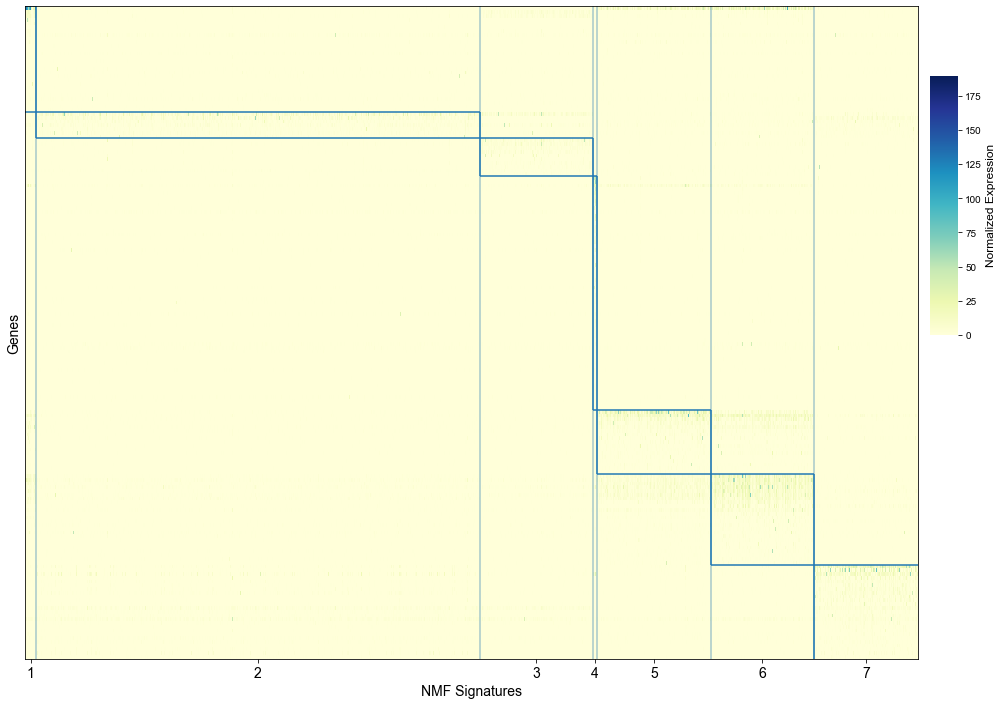

<IPython.core.display.Javascript object>

In [6]:
nmf.signatures()

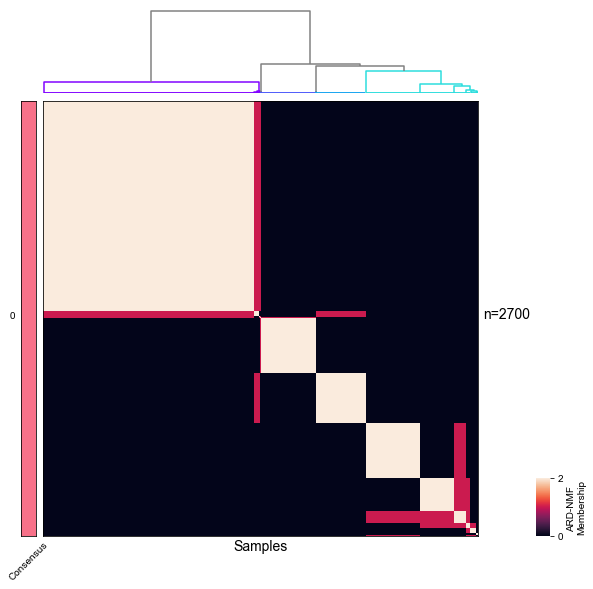

<IPython.core.display.Javascript object>

In [7]:
nmf.cluster()

### Map gene signatures to UMAP

If necessary, we also perform a dimension reduction using Scanpy in this function

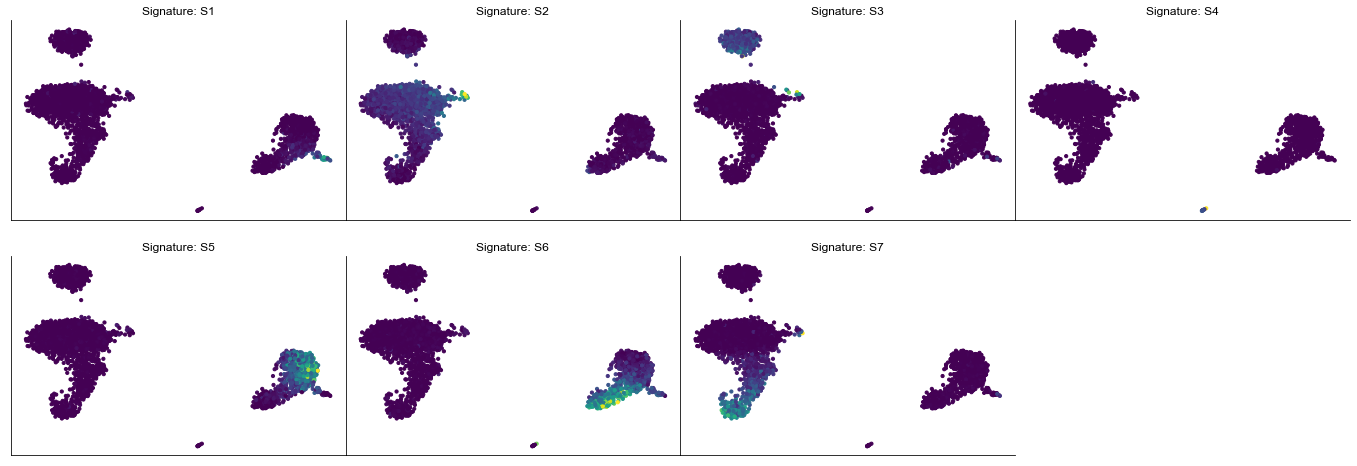

<IPython.core.display.Javascript object>

In [8]:
nmf.plot_umap_signatures(adata)

### Get a specific signature

In [9]:
ann_nmf.ut.fetch_signature(nmf.nmf_genes, 1)

,S1,S2,S3,S4,S5,S6,S7,max,max_id,max_norm,mean_on,mean_off,diff
index,,,,,,,,,,,,,
HLA-DPB1,0.107081,3.527638e-24,0.036646,0.00000,5.910829e-04,0.009001,5.100789e-04,0.107081,1.0,0.445427,43.696968,2.390326,41.306641
HLA-DPA1,0.078615,4.560909e-22,0.026648,0.00000,2.774196e-12,0.014371,6.375680e-04,0.078615,1.0,0.364010,34.939392,2.184852,32.754539
HLA-DRB1,0.075751,0.000000e+00,0.027182,0.00000,4.097725e-03,0.011713,1.828948e-24,0.075751,1.0,0.358642,31.545454,2.170229,29.375225
CST3,0.072273,0.000000e+00,0.000000,0.00227,3.559457e-02,0.035944,0.000000e+00,0.072273,1.0,0.506230,46.181820,3.874391,42.307430
HLA-DQA1,0.022565,0.000000e+00,0.014606,0.00000,0.000000e+00,0.000655,0.000000e+00,0.022565,1.0,0.559575,13.333333,0.554556,12.778777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC021860.1,0.000027,2.147140e-05,0.000012,0.00000,0.000000e+00,0.000000,2.194689e-05,0.000027,1.0,0.619228,0.000000,0.003750,-0.003750
SHPK-1,0.000023,1.798303e-05,0.000014,0.00000,1.099863e-05,0.000000,0.000000e+00,0.000023,1.0,0.648359,0.000000,0.003000,-0.003000
RP11-378J18.3,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.0,NaN,0.000000,0.009374,-0.009374


<IPython.core.display.Javascript object>